### END experiment 11 March 2019 24:00 for weather calculations

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import lifelines
from lifelines.utils import datetimes_to_durations
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import train_test_split
import lifelines as sa
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime
import pickle
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('coxr.csv')
df.columns

Index(['event', 'T', 'ELR_enc', 'HLC_enc', 'Asset_Class_Grouping_enc',
       'Grouping_Full_Name_enc', 'Engineering_Suffix_enc',
       'System_Asset_Type_enc', 'EQUIP_CLASS_DESC_enc', 'weather_station',
       'weather_station_enc', 'Sum', 'Asset_Number', 'birth', 'death', 'end_e',
       'temp_min', 'temp_max', 'humidity_min', 'humidity_max', 'pressure_min',
       'pressure_max', 'wind_speed_min', 'wind_speed_max'],
      dtype='object')

In [3]:
def save_dict_pickle(dict, file):
    with open('./conf/'+file+'.pickle', 'wb') as handle:
        pickle.dump(dict, handle)
    return

In [4]:
len(df)

940

In [5]:
data=df[['event', 'T', 'ELR_enc', 'HLC_enc', 'Asset_Class_Grouping_enc',
       'Grouping_Full_Name_enc', 'Engineering_Suffix_enc',
       'System_Asset_Type_enc', 'EQUIP_CLASS_DESC_enc',
       'weather_station_enc', 'Sum', 'Asset_Number', 
       'temp_min', 'temp_max', 'humidity_min', 'humidity_max', 'pressure_min',
       'pressure_max', 'wind_speed_min', 'wind_speed_max']]

In [6]:
data.columns=['e', 't', 'ELR_enc', 'HLC_enc', 'Asset_Class_Grouping_enc',
       'Grouping_Full_Name_enc', 'Engineering_Suffix_enc',
       'System_Asset_Type_enc', 'EQUIP_CLASS_DESC_enc',
       'weather_station_enc', 'Sum', 'Asset_Number', 
       'temp_min', 'temp_max', 'humidity_min', 'humidity_max', 'pressure_min',
       'pressure_max', 'wind_speed_min', 'wind_speed_max']

In [7]:
data.isnull().sum()

e                           0
t                           0
ELR_enc                     0
HLC_enc                     0
Asset_Class_Grouping_enc    0
Grouping_Full_Name_enc      0
Engineering_Suffix_enc      0
System_Asset_Type_enc       0
EQUIP_CLASS_DESC_enc        0
weather_station_enc         0
Sum                         0
Asset_Number                0
temp_min                    0
temp_max                    0
humidity_min                0
humidity_max                0
pressure_min                0
pressure_max                0
wind_speed_min              0
wind_speed_max              0
dtype: int64

In [8]:
columns=[ 'ELR_enc', 'HLC_enc', 'Asset_Class_Grouping_enc',
       'Grouping_Full_Name_enc', 'Engineering_Suffix_enc',
       'System_Asset_Type_enc', 'EQUIP_CLASS_DESC_enc',
       'weather_station_enc', 'Sum', 'Asset_Number', 
       'temp_min', 'temp_max', 'humidity_min', 'humidity_max', 'pressure_min',
       'pressure_max', 'wind_speed_min', 'wind_speed_max']

In [9]:
def normalize(df, symbols):
    result = df.copy()
    values={}
    for symbol in symbols:
        max_value = df[symbol].max()
        min_value = df[symbol].min()
        mean_value= df[symbol].mean()
        std_value= df[symbol].std()
        print(symbol)
        result[symbol] = (df[symbol] -mean_value) /std_value
        data={}
        data.update({'max': max_value, 'min':min_value, 'mean':mean_value, 'std':std_value})
        

        values.update({symbol:data})
    return result, values

In [10]:
datan, dicc_values=normalize(data,columns)

ELR_enc
HLC_enc
Asset_Class_Grouping_enc
Grouping_Full_Name_enc
Engineering_Suffix_enc
System_Asset_Type_enc
EQUIP_CLASS_DESC_enc
weather_station_enc
Sum
Asset_Number
temp_min
temp_max
humidity_min
humidity_max
pressure_min
pressure_max
wind_speed_min
wind_speed_max


In [11]:
dicc_values

{'ELR_enc': {'max': 29,
  'min': 0,
  'mean': 16.385106382978723,
  'std': 8.197027402792536},
 'HLC_enc': {'max': 3,
  'min': 0,
  'mean': 1.9531914893617022,
  'std': 0.852197826066092},
 'Asset_Class_Grouping_enc': {'max': 8,
  'min': 0,
  'mean': 5.3627659574468085,
  'std': 1.9238143267761296},
 'Grouping_Full_Name_enc': {'max': 9,
  'min': 0,
  'mean': 6.176595744680851,
  'std': 2.1819974792246883},
 'Engineering_Suffix_enc': {'max': 30,
  'min': 0,
  'mean': 17.914893617021278,
  'std': 6.705519755868171},
 'System_Asset_Type_enc': {'max': 103,
  'min': 0,
  'mean': 60.374468085106386,
  'std': 29.04629236848901},
 'EQUIP_CLASS_DESC_enc': {'max': 45,
  'min': 0,
  'mean': 27.708510638297874,
  'std': 10.934217667044225},
 'weather_station_enc': {'max': 4,
  'min': 0,
  'mean': 1.8904255319148937,
  'std': 1.4042813850885107},
 'Sum': {'max': 1672,
  'min': 0,
  'mean': 49.193617021276594,
  'std': 113.98956831418307},
 'Asset_Number': {'max': 18808004,
  'min': 48075,
  'mean':

In [12]:
save_dict_pickle(dicc_values, 'AFI_factors_norm')

In [13]:
datan

,e,t,ELR_enc,HLC_enc,Asset_Class_Grouping_enc,Grouping_Full_Name_enc,Engineering_Suffix_enc,System_Asset_Type_enc,EQUIP_CLASS_DESC_enc,weather_station_enc,Sum,Asset_Number,temp_min,temp_max,humidity_min,humidity_max,pressure_min,pressure_max,wind_speed_min,wind_speed_max
0,0,267.106203,-1.510927,1.228363,1.370836,1.293954,0.907477,0.882231,1.124131,-0.634079,-0.431562,-0.664479,-0.573402,0.432199,-0.103939,0.092823,-0.415582,0.549971,-0.099276,0.511669
1,1,0.791435,-1.510927,1.228363,1.370836,1.293954,0.907477,0.882231,1.124131,-0.634079,-0.431562,-0.664478,0.728876,-2.486032,3.065277,0.092823,-0.263874,-1.386861,-0.099276,-2.255168
2,1,40.656933,-1.510927,1.228363,1.370836,1.293954,0.907477,0.882231,1.124131,-0.634079,-0.431562,-0.664478,0.949094,-1.423645,-0.828331,0.092823,-0.718997,-0.741250,-0.099276,0.511669
3,1,203.419444,-1.510927,1.228363,1.370836,1.293954,0.907477,0.882231,1.124131,-0.634079,-0.431562,-0.664478,0.182408,0.498876,-0.828331,0.092823,-0.718997,-0.741250,-0.099276,0.511669
4,0,443.199953,-1.510927,1.228363,1.370836,1.293954,0.907477,0.882231,1.124131,-0.634079,-0.431562,-0.664478,-0.573402,0.432199,-0.103939,0.092823,-0.415582,0.549971,-0.099276,0.511669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,0,119.275650,-1.022945,0.054927,-0.188566,-0.080933,-0.583831,1.467503,-0.156254,0.078029,0.357983,3.965525,0.250377,-2.008180,0.348806,0.092823,0.039541,0.711373,-0.099276,-0.410610
936,0,402.408983,-1.510927,0.054927,0.851035,0.835658,0.161823,-0.598165,-0.887902,-0.634079,-0.431562,3.985484,-0.573402,0.432199,-0.103939,0.092823,-0.415582,0.549971,-0.099276,0.511669
937,0,405.978671,-0.534963,0.054927,0.851035,0.835658,0.161823,-0.598165,-0.887902,-0.634079,-0.396472,3.988413,-0.573402,0.432199,-0.103939,0.092823,-0.415582,0.549971,-0.099276,0.511669
938,0,301.725650,1.538960,0.054927,-0.188566,-0.080933,0.161823,0.193675,-0.064798,-0.634079,-0.405244,3.991966,-0.573402,0.432199,-0.103939,0.092823,-0.415582,0.549971,-0.099276,0.511669


In [14]:
datax=datan.drop_duplicates(subset=['Asset_Number'], keep='last', )

In [15]:
len(datax)

637

In [16]:
datan.isnull().sum()

e                           0
t                           0
ELR_enc                     0
HLC_enc                     0
Asset_Class_Grouping_enc    0
Grouping_Full_Name_enc      0
Engineering_Suffix_enc      0
System_Asset_Type_enc       0
EQUIP_CLASS_DESC_enc        0
weather_station_enc         0
Sum                         0
Asset_Number                0
temp_min                    0
temp_max                    0
humidity_min                0
humidity_max                0
pressure_min                0
pressure_max                0
wind_speed_min              0
wind_speed_max              0
dtype: int64

In [17]:
datan.to_csv('./data/data_afi.csv', index=False)

In [18]:
train_data, test_data = train_test_split(datan, shuffle =True, test_size =.05)

In [19]:
train_data.shape, test_data.shape

((893, 20), (47, 20))

In [20]:
from tfdeepsurv.datasets import survival_stats

# specify the colnames of observed status and time in your dataset
colname_e = 'e'
colname_t = 't'

--------------- Survival Data Statistics ---------------
# Rows: 893
# Columns: 18 + e + t
# Events Ratio: 0.32%
# Min Time: 0.041666667000000004
# Max Time: 799.324942



<Figure size 864x864 with 0 Axes>

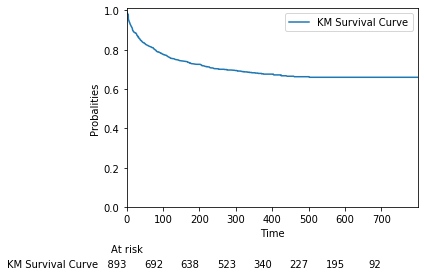

In [21]:
plt.figure(figsize=(12,12))
survival_stats(train_data, t_col=colname_t, e_col=colname_e, plot=True)

--------------- Survival Data Statistics ---------------
# Rows: 47
# Columns: 18 + e + t
# Events Ratio: 0.28%
# Min Time: 5.0
# Max Time: 797.9990052



<Figure size 864x864 with 0 Axes>

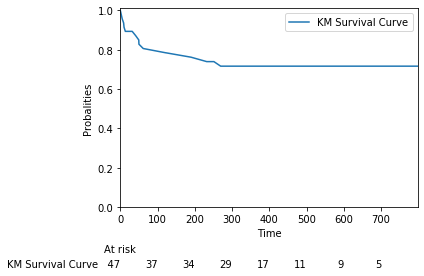

In [22]:
plt.figure(figsize=(12,12))
survival_stats(test_data, t_col=colname_t, e_col=colname_e, plot=True)

In [23]:
from tfdeepsurv.datasets import survival_df

surv_train = survival_df(train_data, t_col=colname_t, e_col=colname_e, label_col="Y")
surv_test = survival_df(test_data, t_col=colname_t, e_col=colname_e, label_col="Y")

# columns 't' and 'e' are packed into an new column 'Y'
surv_train.head()

,ELR_enc,HLC_enc,Asset_Class_Grouping_enc,Grouping_Full_Name_enc,Engineering_Suffix_enc,System_Asset_Type_enc,EQUIP_CLASS_DESC_enc,weather_station_enc,Sum,Asset_Number,temp_min,temp_max,humidity_min,humidity_max,pressure_min,pressure_max,wind_speed_min,wind_speed_max,Y
503,0.684991,-1.118510,-0.708367,-0.539229,-0.434701,-0.667020,-0.796446,0.078029,0.612393,-0.314163,-0.407287,0.429976,-0.194488,0.092823,0.039541,0.711373,-0.099276,-0.410610,-374.598565
420,-0.534963,-1.118510,-0.708367,-0.539229,-0.434701,-0.667020,-0.796446,-0.634079,0.700120,-0.367157,-0.491840,-0.414599,1.344845,0.092823,-0.415582,-0.741250,-0.099276,0.511669,192.156250
576,-1.510927,0.054927,0.851035,0.835658,1.354870,1.295364,-0.887902,-0.634079,-0.414017,-0.224251,-0.573402,0.432199,-0.103939,0.092823,-0.415582,0.549971,-0.099276,0.511669,-309.508982
855,0.684991,-1.118510,-1.747968,-1.914116,-1.478617,-1.217865,-1.345182,0.078029,1.700212,1.848375,0.255814,-2.563822,2.884179,0.092823,-0.112167,-0.741250,-0.099276,-0.410610,106.222222
834,1.538960,0.054927,-0.188566,-0.080933,0.161823,0.193675,-0.064798,0.790137,-0.194699,1.279553,3.064275,-2.597160,3.880218,0.092823,1.101494,-4.130705,-0.099276,-1.794029,5.000000


In [24]:
surv_final = survival_df(datax, t_col=colname_t, e_col=colname_e, label_col="Y")

In [25]:
surv_test.isnull().sum()

ELR_enc                     0
HLC_enc                     0
Asset_Class_Grouping_enc    0
Grouping_Full_Name_enc      0
Engineering_Suffix_enc      0
System_Asset_Type_enc       0
EQUIP_CLASS_DESC_enc        0
weather_station_enc         0
Sum                         0
Asset_Number                0
temp_min                    0
temp_max                    0
humidity_min                0
humidity_max                0
pressure_min                0
pressure_max                0
wind_speed_min              0
wind_speed_max              0
Y                           0
dtype: int64

In [26]:
surv_train.isnull().sum()

ELR_enc                     0
HLC_enc                     0
Asset_Class_Grouping_enc    0
Grouping_Full_Name_enc      0
Engineering_Suffix_enc      0
System_Asset_Type_enc       0
EQUIP_CLASS_DESC_enc        0
weather_station_enc         0
Sum                         0
Asset_Number                0
temp_min                    0
temp_max                    0
humidity_min                0
humidity_max                0
pressure_min                0
pressure_max                0
wind_speed_min              0
wind_speed_max              0
Y                           0
dtype: int64

In [27]:
import tensorflow as tf

In [54]:
tf.reset_default_graph()

In [28]:
from tfdeepsurv import dsnn

# Number of features in your dataset
input_nodes = len(surv_train.columns) - 1
# Specify your neural network structure
hidden_layers_nodes = [6, 3, 1]

# the arguments of dsnn can be obtained by Bayesian Hyperparameters Tuning.
# It would affect your model performance largely!
nn_config = {
    "learning_rate": 0.07,
    "learning_rate_decay": 1.0,
    "activation": 'tanh', 
    "L1_reg": 3.4e-5, 
    "L2_reg": 8.8e-5, 
    "optimizer": 'sgd',
    "dropout_keep_prob": 1.0,
    "seed": 1
}

# ESSENTIAL STEP-1: Pass arguments
model = dsnn(
    input_nodes, 
    hidden_layers_nodes,
    nn_config
)

# ESSENTIAL STEP-2: Build Computation Graph
model.build_graph()







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [29]:
import os

In [30]:
checkpoint_path = "model/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [31]:
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)



Average loss at step 100: 6.16581
Average loss at step 200: 5.35876
Average loss at step 300: 5.33213
Average loss at step 400: 5.32703
Average loss at step 500: 5.32502
Average loss at step 600: 5.32395
Average loss at step 700: 5.32330
Average loss at step 800: 5.32286
Average loss at step 900: 5.32254
Average loss at step 1000: 5.32230
Average loss at step 1100: 5.32211
Average loss at step 1200: 5.32197
Average loss at step 1300: 5.32185
Average loss at step 1400: 5.32175
Average loss at step 1500: 5.32167
Average loss at step 1600: 5.32160
Average loss at step 1700: 5.32154
Average loss at step 1800: 5.32148
Average loss at step 1900: 5.32144
Average loss at step 2000: 5.32140
Average loss at step 2100: 5.32136
Average loss at step 2200: 5.32133
Average loss at step 2300: 5.32130
Average loss at step 2400: 5.32128
Average loss at step 2500: 5.32125
Average loss at step 2600: 5.32123
Average loss at step 2700: 5.32121
Average loss at step 2800: 5.32120
Average loss at step 2900: 5

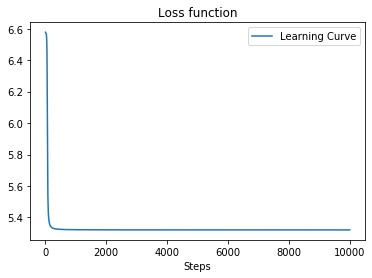

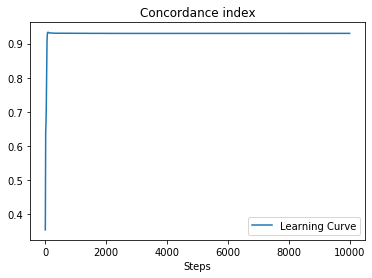

In [32]:
Y_col = ["Y"]
X_cols = [c for c in surv_train.columns if c not in Y_col]

# model saving and loading is also supported!
# read comments of `train()` function if necessary.

# ESSENTIAL STEP-3: Train Model
# `num_steps` is also a important parameters
watch_list = model.train(
    surv_train[X_cols], surv_train[Y_col],
    num_steps=10000,
    num_skip_steps=100,
    plot=True,
    save_model='./model/afe',
)

In [28]:
#sess1=tf.Session()

In [29]:
#sess1.run(tf.global_variables_initializer())

In [30]:
# saver = tf.compat.v1.train.Saver()
# saver.restore(sess1, './model/afe')

In [31]:
#log_hr = sess1.run(surv_test[Y_col], feed_dict={surv_test[X_cols].values, 1.0})

In [33]:

print("CI on training data:", model.evals(surv_train[X_cols], surv_train[Y_col]))
print("CI on test data:", model.evals(surv_test[X_cols], surv_test[Y_col]))

CI on training data: 0.9301819816835081
CI on test data: 0.9230769230769231


In [34]:
 X_cols

['ELR_enc',
 'HLC_enc',
 'Asset_Class_Grouping_enc',
 'Grouping_Full_Name_enc',
 'Engineering_Suffix_enc',
 'System_Asset_Type_enc',
 'EQUIP_CLASS_DESC_enc',
 'weather_station_enc',
 'Sum',
 'Asset_Number',
 'temp_min',
 'temp_max',
 'humidity_min',
 'humidity_max',
 'pressure_min',
 'pressure_max',
 'wind_speed_min',
 'wind_speed_max']

In [35]:
surv_pred=surv_final[X_cols]

In [37]:
surv_pred.to_csv('./AFI/data/final_afi.csv', index=False)

In [ ]:
stest[0:5]

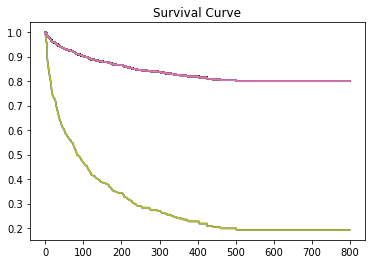

In [38]:

# predict survival function
pred=model.predict_survival_function(surv_pred, plot=True)

In [39]:
len(pred)

637

In [44]:
pred.columns

Float64Index([0.041666667000000004,          0.427777778,          0.459027778,
                       0.791435185,          0.942361111,   1.1006944440000002,
                       1.354861111,          1.466666667,   1.6291666669999998,
                1.6826388890000001,
              ...
                       789.3214706,    790.1791086000001,    790.2131377999999,
                       790.2589705,          790.3457756,          790.5071295,
                       796.9707768,          797.0923029,          797.1582758,
                        799.324942],
             dtype='float64', length=870)

In [45]:
cols=list(pred.columns)

In [50]:
ncols=[]
for col in cols:
    ncols.append(np.int(col*24//1))

In [53]:
ncols[-1]

19183

In [ ]:
output_node_names = [n.name for n in tf.get_default_graph().as_graph_def().node]

In [ ]:
output_node_names

In [34]:
import tensorflow as tf

meta_path = 'model/afe.meta' # Your .meta file
output_node_names = [n.name for n in tf.get_default_graph().as_graph_def().node]  
black_list=['node _retval_layer1/weights_1_0_9', 'node _retval_layer1/weights_4_0_14', 'node _retval_layer1/weights_1_0_13',
           'node _retval_layer2/biases_1_0_22','node _retval_layer2/biases_5_0_29','node _retval_layer3/weights_4_0_58'
           ,'node _retval_layer1/weights_9_0_29','node _retval_layer2/biases_2_0_36']# Output nodes

with tf.Session() as sess:
    # Restore the graph
    saver = tf.train.import_meta_graph(meta_path)
    saver.restore(sess,tf.train.latest_checkpoint('model'))
        # Freeze the graph
    frozen_graph_def = tf.graph_util.convert_variables_to_constants(
        sess,
        sess.graph_def,
        output_node_names, variable_names_blacklist= black_list)

        # Save the frozen graph
    with open('model/output_graph.pb', 'wb') as f:
        f.write(frozen_graph_def.SerializeToString())

INFO:tensorflow:Restoring parameters from model\afe
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 7 variables.
INFO:tensorflow:Converted 7 variables to const ops.


In [ ]:
tf.compat.v1.graph_util.extract_sub_graph()

In [42]:
pred.to_csv('predictions.csv')

In [ ]:
685/24

In [ ]:
pred.head()

In [ ]:
# predict log hazard ratio
print(model.predict(stest[0:10]))
# predict hazard ratio
print(model.predict(stest[0:10], output_margin=False))

In [ ]:
model.load_weights('./model/afe.data-00000-of-00001')

In [ ]:
type(model)

In [ ]:
model.close_session()

In [ ]:
tf.reset_default_graph()

In [ ]:
sess=tf.Session()   

In [ ]:
#First let's load meta graph and restore weights
saver = tf.train.import_meta_graph('./model/afe.meta')

In [ ]:
saver.restore(sess,tf.train.latest_checkpoint('./model'))

In [ ]:
warnings

In [ ]:
graph = tf.get_default_graph()

In [ ]:
all_vars = tf.get_collection('vars')
for v in all_vars:
    v_ = sess.run(v)
    print(v_)

In [ ]:
graph.get_tensor_by_name

In [ ]:
watch_list